![imagen](./img/Bitcoin_01-1.png)

# Arqueología financiera del criptoactivo Bitcoin

### Indice:

- Introducción
- Fuentes de datos
- Contenido del DF

### Contenido del EDA

1.- Analisis Anual.

2.- Analisis Mensual.

3.- Analisis Diario.

4.- Halvings.

5.- Evitando dias EV- y EV+

6.- Cruce de Medias.

# Introducción

Analisis del Bitcoin desde una perspectiva historica. 
- ¿Cual ha sido su comportamiento en los últimos años?
- ¿Que conclusiones podemos obtener con los datos historicos?
- ¿Pueden darnos estas conclusiones un nuevo pensamiento respecto a lo que esta por venir?

### Fuentes de Datos 

La fuente de datos la hemos obtenido principalemente de Kaggle:
- Archivo CSV con el historico de cotizaciones de bitcoin en diario. Lo podemos encontrar en el siguiente enlace [este enlace] ([aqui](https://www.kaggle.com/datasets/dannyrevaldo/bitcoin-price-weekly-update))
- Este enlace actualiza el dataset semanalmente.


### Contenido del Dataset:

- Fecha: Una fecha específica dentro de cada día de negociación, que indica cuándo se registró el precio del Bitcoin.

- Precio: El precio del Bitcoin en un momento específico durante el período de negociación diario, que muestra su valor en la moneda respectiva (USD).

- Apertura: El precio de apertura del Bitcoin al inicio del período de negociación de cada día, ilustrando el precio de inicio para la negociación de Bitcoin durante ese día.

- Máximo: El precio máximo del Bitcoin alcanzado durante el período de negociación diario, ofreciendo información sobre el valor más alto que alcanzó el Bitcoin dentro de ese día.

- Mínimo: El precio más bajo del Bitcoin observado durante el período de negociación diario, reflejando el valor más bajo del Bitcoin dentro de ese día.

- Vol. (Volumen): El volumen de negociación del Bitcoin dentro de una unidad específica (por ejemplo, número de Bitcoins negociados) durante el período de negociación diario, proporcionando información sobre la actividad comercial en el mercado del Bitcoin.

- Cambio %: El cambio porcentual en el precio del Bitcoin desde la apertura hasta el cierre dentro de cada día de negociación, indicando la variación relativa de precios en comparación con el precio de apertura.

In [1721]:
# Importando las librerias necesarias

import datetime as dt
import pandas as pd
import numpy as np
import calendar

from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import yfinance as yf


from pandas_datareader import data as pdr

##### Limpieza e Importacion de datos
- [Limpieza de datos] (link de git)

# Analisis movimientos de precios anuales

In [1722]:
btc_dia = pd.read_csv ('Data/btc_dia.csv') # importando la tabla necesaria

btc_dia.set_index('Date', inplace=True) # Creando las fechas como index

btc_dia.index = pd.to_datetime(btc_dia.index) # Dando al index valor de tiempo

# Ordenar el índice de fechas de manera ascendente
btc_dia = btc_dia.sort_index()

btc_movil = btc_dia.copy ()
# Realizar la selección después de ordenar el índice
btc_dia = btc_dia.loc['2012-01-01':]



In [1723]:
btc_ultimo_dia_año = btc_dia.resample('YE').last() # agrupando el df por años


In [1724]:
# creando la columna retornos
btc_ultimo_dia_año ['retornos'] = btc_ultimo_dia_año ['Price'].pct_change ().round (4) 

# Creando un nuevo df solo con los retornos y el index fecha.
retornos_anuales = btc_ultimo_dia_año ['retornos']
retornos_anuales = pd.DataFrame (retornos_anuales)

# obteniendo el año solo de cada fecha.
fec = [str(fecha.year) for fecha in retornos_anuales.index]

# Creando una lista que contiene los retornos.
retornoko = retornos_anuales['retornos'].tolist()


# evitando el año 2013 para ver mejor la grafica. Comentar estas funciones para ver el grafico con 2013
fec = fec[2:]
retornoko = retornoko [2:]

print(retornoko)

[-0.605, 0.3522, 1.2395, 13.3821, -0.7322, 0.9401, 3.0229, 0.5966, -0.6422, 1.5562, 0.599]


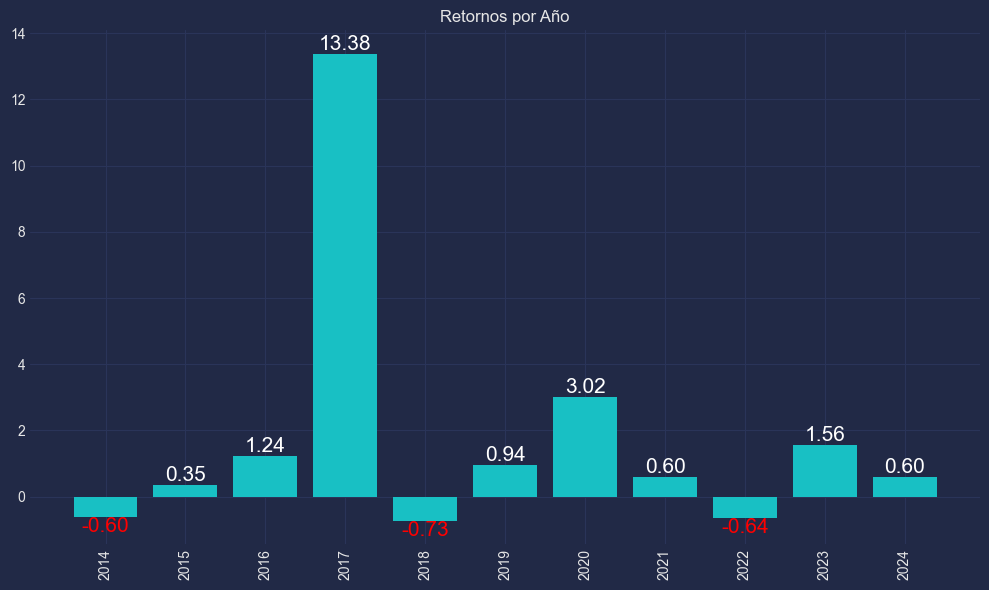

In [1725]:

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')


plt.figure(figsize=(10, 6))
bars = plt.bar(fec, retornoko)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,  
             height,                             
             f'{height:.2f}',                    
             ha='center',                        
             va='bottom' if height > 0 else 'top',  
             fontsize=15,                         
             color='white' if height > 0 else 'Red')  


#plt.xlabel('Fecha')
#plt.ylabel('Retornos')
plt.title('Retornos por Año')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [1726]:
# Calcular la variación diaria (volatilidad) como la diferencia entre el precio máximo y mínimo
btc_ultimo_dia_año['Volatility'] = btc_ultimo_dia_año['High'] - btc_ultimo_dia_año['Low']

# Calcular la volatilidad promedio durante el período de tiempo
average_volatility = btc_ultimo_dia_año['Volatility'].mean()

print (f'La volatilidad media anual en bitcoin desde 2013 hasta hoy es de {average_volatility.round (2)}')



La volatilidad media anual en bitcoin desde 2013 hasta hoy es de 753.85


In [1727]:
media_retornos = retornos_anuales['retornos'].mean().round (2)

print (media_retornos)


6.72


In [1728]:
media_retornos_sin_2017 = retornos_anuales['retornos'].iloc [9:].mean().round (2)

print (media_retornos_sin_2017)

0.53


# ANALISIS MENSUAL DE BITCOIN

In [1729]:
btc_mes = pd.read_csv ('Data/btc_dia.csv')

btc_mes.set_index('Date', inplace=True)

btc_mes.index = pd.to_datetime(btc_mes.index)

btc_mes = btc_dia.resample('ME').last()

btc_mes  = btc_mes.sort_index()

btc_mes = btc_mes.loc['2014-01-01':]

btc_mes = pd.DataFrame (btc_mes ['Price'])



In [1730]:
btc_mes ['DSR'] = btc_mes ['Price'].pct_change (1)
btc_mes ['log_returns'] = np.log (1 + btc_mes ['DSR'])

btc_retor = btc_mes.copy () # Variable que usaremos despues

In [1731]:
nombre_mes =  []
num_mes = []

for i in range ( 0, len (btc_mes)):
    df_date = str (btc_mes.index [i])
    df_month = df_date.split ('-') [1]
    df_month_name = calendar.month_name [int (df_month)]

    nombre_mes.append (df_month_name)
    num_mes.append (int(df_month))

In [1732]:

btc_mes ['nombre_mes'] = nombre_mes
btc_mes ['num_mes'] = num_mes
series = btc_mes.groupby ('num_mes') ['log_returns'].mean ()*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

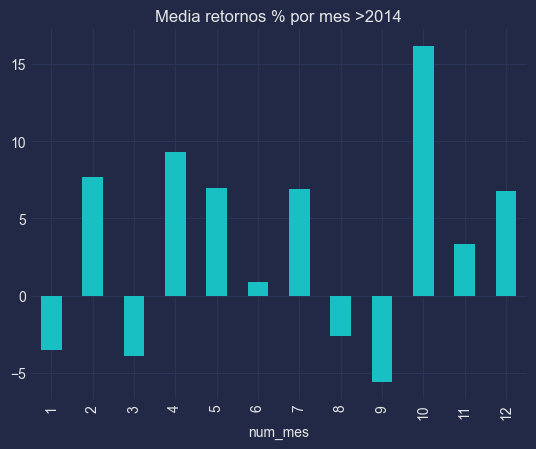

In [1733]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
series.plot (kind = 'bar', title = 'Media retornos % por mes >2014')
plt.xticks (rotation = 90)


In [1734]:
btc_fil = btc_mes.copy ()

btc_fil = btc_fil.drop(columns=['DSR', 'log_returns'])
#btc_fil  = btc_fil[~btc_fil['num_mes'].isin([4, 10])]


btc_fil ['DSR'] = btc_fil ['Price'].pct_change (1)
btc_fil ['log_returns'] = np.log (1 + btc_fil ['DSR'])

# Reemplazar los valores en columna1 y columna2 donde num_mes es igual a 4 o 10
btc_fil.loc[btc_fil['num_mes'].isin([3, 9]), ['DSR', 'log_returns']] = 0


btc_fil ['ganancias'] = (1 + btc_fil['DSR']).cumprod()


#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

btc_fil.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2014-01-31 to 2024-03-31
Freq: ME
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        123 non-null    int64  
 1   nombre_mes   123 non-null    object 
 2   num_mes      123 non-null    int64  
 3   DSR          122 non-null    float64
 4   log_returns  122 non-null    float64
 5   ganancias    122 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.7+ KB


In [1735]:

btc_mes ['ganancias'] = (1 + btc_mes['DSR']).cumprod()

btc_mes.tail (4)

,Price,DSR,log_returns,nombre_mes,num_mes,ganancias
Date,,,,,,
2023-12-31,42272,0.120916,0.114147,December,12,45.066098
2024-01-31,42580,0.007286,0.007260,January,1,45.394456
2024-02-29,61169,0.436566,0.362256,February,2,65.212154
2024-03-31,67594,0.105037,0.099879,March,3,72.061834


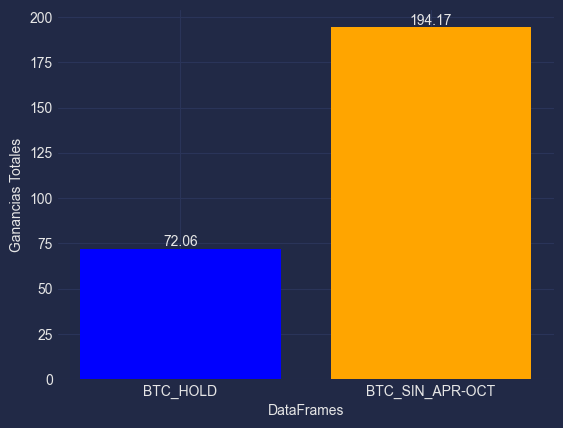

In [1736]:
import matplotlib.pyplot as plt

# Calcular las ganancias totales de cada DataFrame
ganancias_totales_mes = btc_mes.iloc[-1]['ganancias']
ganancias_totales_fil = btc_fil.iloc[-1]['ganancias']

# Crear una lista con las ganancias totales
ganancias_totales = [ganancias_totales_mes, ganancias_totales_fil]

# Crear una lista con los nombres de los DataFrames
nombres_df = ['BTC_HOLD', 'BTC_SIN_APR-OCT']

# Configurar el gráfico de barras
plt.bar(nombres_df, ganancias_totales, color=['blue', 'orange'])

# Configurar etiquetas y título
plt.xlabel('DataFrames')
plt.ylabel('Ganancias Totales')


# Agregar números encima de cada columna
for i in range(len(nombres_df)):
    plt.text(nombres_df[i], ganancias_totales[i], str(round(ganancias_totales[i], 2)),
             ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()

# ANALISIS DIARIO DE BITCOIN

In [1737]:
btc_dia = pd.read_csv ('Data/btc_dia.csv')

btc_dia.set_index('Date', inplace=True)

btc_dia.index = pd.to_datetime(btc_dia.index)

btc_box = btc_dia.copy ()

# Cambiamos esta linea para hacer graficos de diferentes temporalidades

btc_dia = btc_dia.loc['2013-01-01':]

btc_dia = pd.DataFrame (btc_dia ['Price'])

btc_dia.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4095 entries, 2024-03-18 to 2013-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   4095 non-null   int64
dtypes: int64(1)
memory usage: 64.0 KB


In [1738]:
# Crear listas vacías para los días de la semana
lunes = []
martes = []
miercoles = []
jueves = []
viernes = []
sabado = []
domingo = []

In [1739]:
def get_dsr (day,dsr):
    if day == 'Monday':
        lunes.append (float (dsr))
    elif day == 'Tuesday':
        martes.append (float (dsr))
    elif day == 'Wednesday':
        miercoles.append (float (dsr))
    elif day == 'Thursday':
        jueves.append (float (dsr))
    elif day == 'Friday':
        viernes.append (float (dsr))
    elif day == 'Saturday':
        sabado.append (float (dsr))
    elif day == 'Sunday':
        domingo.append (float (dsr))
    else:
        print ("algo salio mal")

In [1740]:
# calculando y mostrando daily simple return

btc_dia = btc_dia.sort_index()

dsr = btc_dia ['Price'].pct_change (1)

btc_dia ['retornos'] = dsr

btc_dia = btc_dia [1:]

btc_dia.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4094 entries, 2013-01-02 to 2024-03-18
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4094 non-null   int64  
 1   retornos  4094 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 96.0 KB


In [1741]:
for i in range (0, len (btc_dia)):
    btc_dia_dsr = btc_dia ['retornos'][i]
    curr_date = btc_dia.index [i]
    btc_dia_name = calendar.day_name [curr_date.weekday ()]

# añadir los simple return al dia correspondiente

    get_dsr (btc_dia_name, btc_dia_dsr  )

C:\Users\pobla\AppData\Local\Temp\ipykernel_11936\2217720766.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [1742]:
def AVG (day):
    if not day:
        return [0]
    else:
        return [sum(day)/len (day)]

In [1743]:
# crear un df y poner el index a los dias de la semana

df_returns = pd.DataFrame (index = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo'])

df_returns ['AVG'] = AVG (lunes) + AVG (martes) + AVG (miercoles) + AVG (jueves) + AVG (viernes) + AVG (sabado) + AVG (domingo)

In [1744]:
df_returns

,AVG
lunes,0.006784
martes,0.003661
miercoles,0.008006
jueves,0.000086
viernes,0.002030
sabado,0.003545
domingo,0.001828


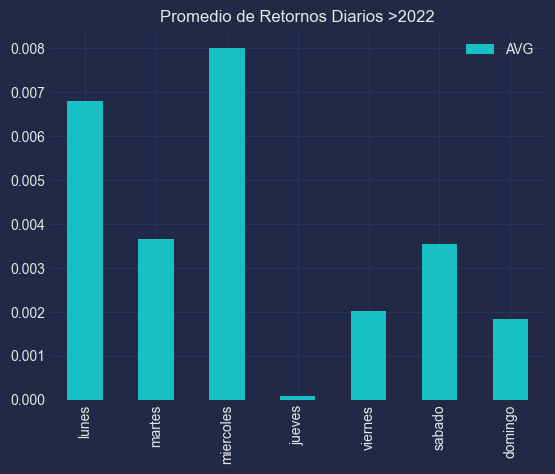

In [1745]:
# Graficar los retornos como un gráfico de barras
df_returns.plot.bar()
plt.title('Promedio de Retornos Diarios >2022')
fig = plt.gcf()
plt.show()


In [1746]:
btc_dia = btc_dia.loc['2015-01-01':]

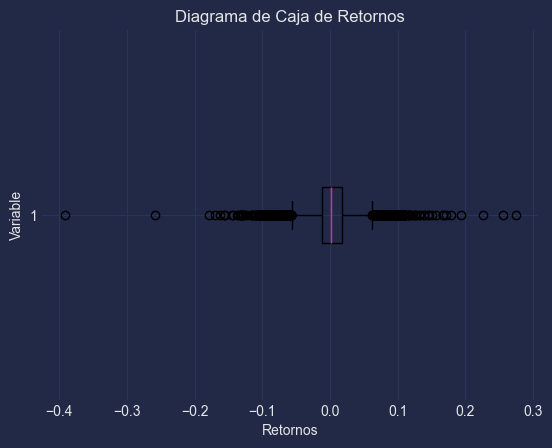

In [1747]:
# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_dia.dropna(subset=['retornos'])

# Crear el boxplot en horizontal
plt.boxplot(btc_box_clean['retornos'], vert=False)

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Variable')
plt.title('Diagrama de Caja de Retornos')

# Mostrar el boxplot
plt.show()


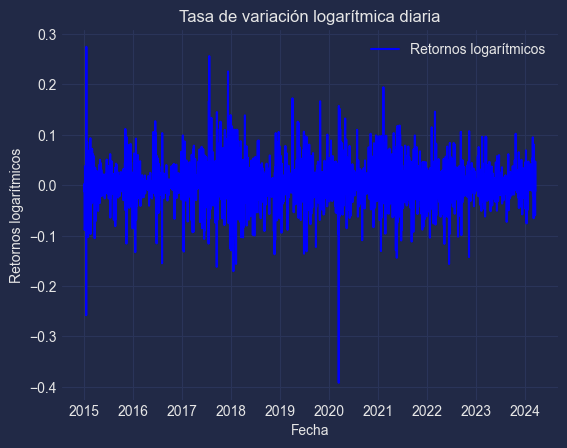

In [1748]:
plt.plot(btc_dia.index, btc_dia.retornos, label='Retornos logarítmicos', color='blue')

# Configurar etiquetas y título del gráfico
plt.xlabel('Fecha')
plt.ylabel('Retornos logarítmicos')
plt.title('Tasa de variación logarítmica diaria')
plt.legend()

# Mostrar el gráfico
plt.show()

# HALVING Y SU COMPORTAMIENTO

In [1749]:
def calcular_rentabilidad_acumulada(df, columna, inicio, fin):

    periodo = df.loc[inicio:fin]
    rentabilidad_acumulada = periodo[columna].sum()

    return rentabilidad_acumulada

rentabilidad_post_2 = calcular_rentabilidad_acumulada(btc_dia, 'retornos', '2016-07-01','2018-07-01')
rentabilidad_mes_2 = calcular_rentabilidad_acumulada(btc_dia, 'retornos', '2016-07-01','2016-08-01')

print(f'En el mes del segundo halving el bitcoin tuvo un movimiento del {(rentabilidad_mes_2 * 100).round(2)} %'
      f' y en los siguientes dos años fue de {(rentabilidad_post_2 * 100).round(2)} %')

rentabilidad_post_3 = calcular_rentabilidad_acumulada(btc_dia, 'retornos', '2020-05-01','2022-05-01')
rentabilidad_mes_3 = calcular_rentabilidad_acumulada(btc_dia, 'retornos', '2020-05-01','2020-06-01')

print(f'En el mes del segundo halving el bitcoin tuvo un movimiento del {(rentabilidad_mes_3 * 100).round(2)} %'
      f' y en los siguientes dos años fue de {(rentabilidad_post_3 * 100).round(2)} %')

En el mes del segundo halving el bitcoin tuvo un movimiento del -9.05 % y en los siguientes dos años fue de 298.1 %
En el mes del segundo halving el bitcoin tuvo un movimiento del 18.84 % y en los siguientes dos años fue de 199.38 %


#  RENTABILIDAD EVITANDO MEJORES Y/O PEORES MESES

In [1750]:
btc_retor = btc_retor.loc['2014-01-01':]

btc_retor.head ()

,Price,DSR,log_returns
Date,,,
2014-01-31,938,NaN,NaN
2014-02-28,573,-0.389126,-0.492864
2014-03-31,444,-0.225131,-0.255061
2014-04-30,445,0.002252,0.002250
2014-05-31,627,0.408989,0.342872


In [1751]:


btc_sin_up = btc_retor.copy ()
btc_sin_up = pd.DataFrame (btc_sin_up)
btc_sin_up.index = pd.to_datetime(btc_sin_up.index)

btc_sin_up_down = btc_retor.copy ()
btc_sin_up_down = pd.DataFrame (btc_sin_up_down)
btc_sin_up_down.index = pd.to_datetime(btc_sin_up_down.index)



In [1752]:
btc_retor ['ganancias'] = (1 + btc_retor ['DSR']).cumprod()
btc_retor.tail ()

,Price,DSR,log_returns,ganancias
Date,,,,
2023-11-30,37712,0.088369,0.084681,40.204691
2023-12-31,42272,0.120916,0.114147,45.066098
2024-01-31,42580,0.007286,0.007260,45.394456
2024-02-29,61169,0.436566,0.362256,65.212154
2024-03-31,67594,0.105037,0.099879,72.061834


In [1753]:
indices_mejores = btc_retor ['DSR'].nlargest(5).index
btc_sin_up.loc[indices_mejores, 'DSR'] = 0.0
btc_sin_up ['ganancias'] = (1 + btc_sin_up['DSR']).cumprod()
btc_sin_up.tail ()

,Price,DSR,log_returns,ganancias
Date,,,,
2023-11-30,37712,0.088369,0.084681,3.913273
2023-12-31,42272,0.120916,0.114147,4.386452
2024-01-31,42580,0.007286,0.007260,4.418413
2024-02-29,61169,0.436566,0.362256,6.347343
2024-03-31,67594,0.105037,0.099879,7.014048


In [1754]:
mejores = btc_sin_up_down['DSR'].nlargest(5).index
peores = btc_sin_up_down['DSR'].nsmallest(5).index

# Asignar 0.0 a los valores correspondientes en la columna 'DSR'
btc_sin_up_down.loc[mejores, 'DSR'] = 0.0
btc_sin_up_down.loc[peores, 'DSR'] = 0.0
btc_sin_up_down ['ganancias'] = (1 + btc_sin_up_down['DSR']).cumprod()

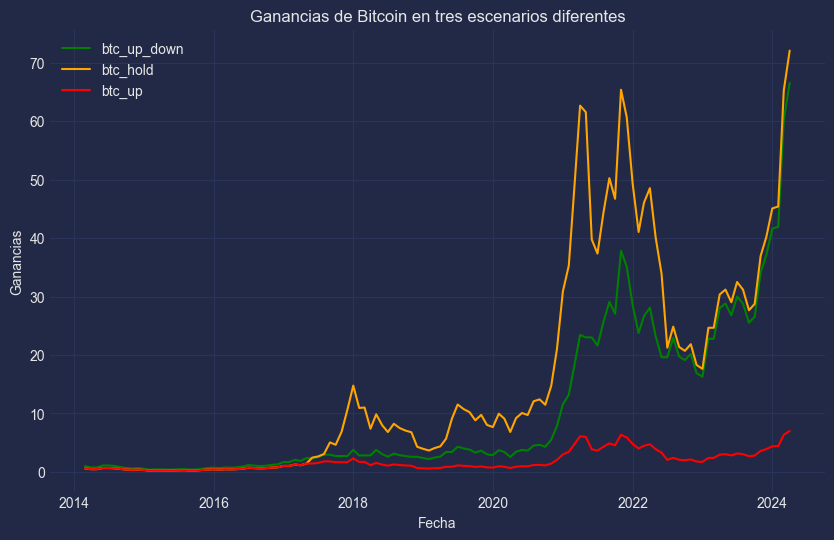

In [1755]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar las ganancias de cada DataFrame
plt.plot(btc_sin_up_down.index, btc_sin_up_down['ganancias'], label= 'btc_up_down', color= 'green')
plt.plot(btc_mes.index, btc_mes['ganancias'], label='btc_hold', color= 'orange')
plt.plot(btc_sin_up.index, btc_sin_up['ganancias'], label='btc_up', color= 'red')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ganancias')
plt.title('Ganancias de Bitcoin en tres escenarios diferentes')
plt.legend()  # Mostrar leyenda

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [1756]:
btc_hold = btc_mes['ganancias'].iloc[-1].round(2)
btc_updpwn = btc_sin_up_down['ganancias'].iloc[-1].round(2)
btc_sin_1 = btc_sin_up['ganancias'].iloc[-1].round(2)

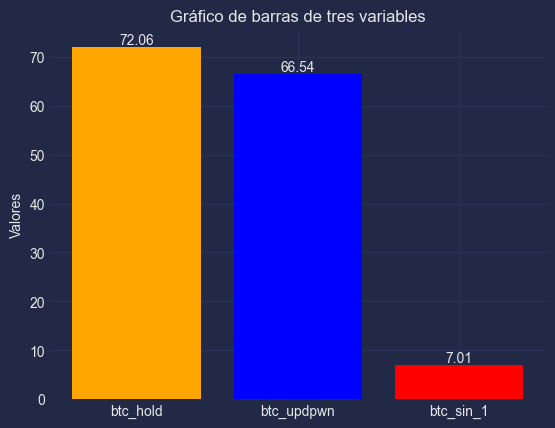

In [1757]:
# Datos
variables = ['btc_hold', 'btc_updpwn', 'btc_sin_1']
valores = [btc_hold, btc_updpwn, btc_sin_1]

# Crear el gráfico de barras
plt.bar(variables, valores, color=['orange', 'blue', 'red'])

# Agregar los valores numéricos encima de las columnas
for i, valor in enumerate(valores):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

# Configurar etiquetas y título
plt.ylabel('Valores')
plt.title('Gráfico de barras de tres variables')

# Mostrar el gráfico
plt.show()


# Estrategia Medias Moviles

In [1758]:
btc_movil = pd.DataFrame (btc_movil ['Price'])
btc_movil = btc_movil.sort_index()
btc_movil = btc_movil.resample('W').first()
btc_movil = btc_movil.loc['2014-01-01':]
btc_movil.head ()

,Price
Date,
2014-01-05,804.0
2014-01-12,1012.0
2014-01-19,922.0
2014-01-26,956.0
2014-02-02,943.0


In [1759]:
short_window = 30
long_window = 100

señales = pd.DataFrame (index = btc_movil.index)
señales ["signals"] = 0
señales ['Price'] = btc_movil ['Price']

In [1760]:
señales["short"] = btc_movil.rolling(short_window).mean()

señales["long"] = btc_movil.rolling(long_window).mean()

señales["signals"] = np.where(señales["short"] > señales["long"], 1, 0)

señales["positions"] = señales["signals"].diff()

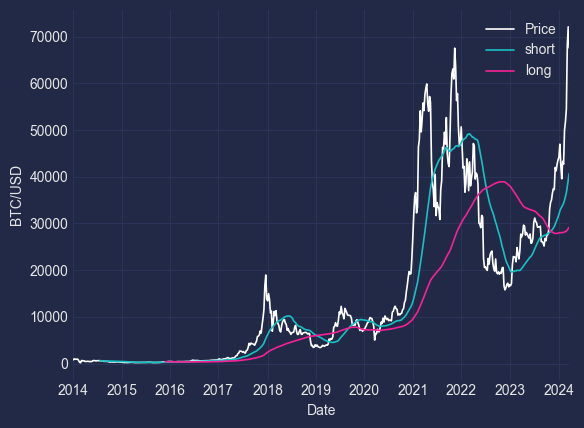

In [1761]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="BTC/USD")
btc_movil.plot(ax=ax1, color="white", lw=1.2)  # Cambia "blue" por el color que desees
señales[["short", "long"]].plot(ax=ax1, lw=1.2)

# Plot de los puntos de compra y venta
ax1.plot(señales["short"][señales["positions"] == 1].index,
         señales["short"][señales["positions"] == 1])

ax1.plot(señales["short"][señales["positions"] == -1].index,
         señales["short"][señales["positions"] == -1])

plt.legend()
plt.show()


In [1762]:

señales_compra = señales.loc[señales['positions'] == 1]

print (señales_compra)

señales_venta = señales.loc[señales['positions'] == -1]

print (señales_venta)

            signals    Price         short      long  positions
Date                                                           
2016-04-10        1    419.0    364.766667    359.49        1.0
2019-09-15        1  10309.0   7794.933333   7675.95        1.0
2023-11-12        1  35042.0  28480.733333  28236.92        1.0
            signals    Price         short      long  positions
Date                                                           
2019-01-13        0   3985.0   5958.533333   6029.24       -1.0
2022-07-10        0  20215.0  37476.766667  37564.21       -1.0
